In [25]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

['kernel_linear_regression_toy' 'kernel_linear_regression_toy_basis_2'
 'kernel_linear_regression_toy_basis_4'
 'kernel_linear_regression_toy_basis_4_normalized'
 'kernel_linear_regression_toy_dim_20_basis_2_normalized']
                                 run_id                      task  \
0     sanity-check-quadratic-regression  kernel_linear_regression   
1  low-dimension-joint-linear-quadratic  kernel_linear_regression   
2  ba425328-3ac3-4199-b7f4-b4213a2a8198  kernel_linear_regression   
3  b233b6d3-c0fd-4fdb-957d-95853fc46eb7  kernel_linear_regression   
4  51c9aca3-5337-4efb-a632-1f23c6967f6d  kernel_linear_regression   

         model       kwargs  num_tasks  num_examples  n_dims  n_layer  n_head  \
0  Transformer  basis_dim=2         -1            -1       5       12       8   
1  Transformer  basis_dim=2         -1            -1       5       12       8   
2  Transformer  basis_dim=4         -1            -1       5       12       8   
3  Transformer  basis_dim=4         -1  

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
0,sanity-check-quadratic-regression,kernel_linear_regression,Transformer,basis_dim=2,-1,-1,5,12,8,kernel_linear_regression_toy
1,low-dimension-joint-linear-quadratic,kernel_linear_regression,Transformer,basis_dim=2,-1,-1,5,12,8,kernel_linear_regression_toy_basis_2
2,ba425328-3ac3-4199-b7f4-b4213a2a8198,kernel_linear_regression,Transformer,basis_dim=4,-1,-1,5,12,8,kernel_linear_regression_toy_basis_4
3,b233b6d3-c0fd-4fdb-957d-95853fc46eb7,kernel_linear_regression,Transformer,basis_dim=4,-1,-1,5,12,8,kernel_linear_regression_toy_basis_4_normalized
4,51c9aca3-5337-4efb-a632-1f23c6967f6d,kernel_linear_regression,Transformer,basis_dim=2,-1,-1,20,12,8,kernel_linear_regression_toy_dim_20_basis_2_no...


In [27]:
task = "kernel_linear_regression"
#task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"

run_id = "b233b6d3-c0fd-4fdb-957d-95853fc46eb7"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if True:
    metrics = get_run_metrics(run_path)  # these are normally precomputed at the end of training

{'standard': {'task_name': 'kernel_linear_regression', 'n_dims': 5, 'n_points': 41, 'batch_size': 64, 'data_name': 'gaussian', 'prompting_strategy': 'standard'}}


100%|██████████| 1/1 [00:00<00:00, 43690.67it/s]

{'standard': {'gpt2_embd=256_layer=12_head=8': {'mean': [5.152948379516602, 9.003767013549805, 4.58461856842041, 3.7518680095672607, 3.763383388519287, 2.315638542175293, 2.3740532398223877, 1.9447996616363525, 1.8093526363372803, 1.1021500825881958, 0.9859701991081238, 0.8105875849723816, 0.6058849096298218, 0.5764390230178833, 0.567481517791748, 0.4395158886909485, 0.4540995657444, 0.300884872674942, 0.21005992591381073, 0.21638217568397522, 0.26429805159568787, 0.11279453337192535, 0.10686343908309937, 0.15481515228748322, 0.0805123895406723, 0.2023363560438156, 0.13293179869651794, 0.19485458731651306, 0.10562698543071747, 0.05220532417297363, 0.0957971066236496, 0.06436781585216522, 0.04726765304803848, 0.05526595562696457, 0.024741968140006065, 0.05694790557026863, 0.0447068028151989, 0.03262711688876152, 0.020401712507009506, 0.03195652365684509, 0.0309467576444149], 'std': [11.280203819274902, 124.75800323486328, 21.555522918701172, 11.860811233520508, 29.11820411682129, 9.0806

# Plot pre-computed metrics

kernel_linear_regression_toy_basis_4_normalized b233b6d3-c0fd-4fdb-957d-95853fc46eb7
{'standard': {'task_name': 'kernel_linear_regression', 'n_dims': 5, 'n_points': 41, 'batch_size': 64, 'data_name': 'gaussian', 'prompting_strategy': 'standard'}}


100%|██████████| 1/1 [00:00<00:00, 48210.39it/s]

{'standard': {'gpt2_embd=256_layer=12_head=8': {'mean': [5.152948379516602, 9.003767013549805, 4.58461856842041, 3.7518680095672607, 3.763383388519287, 2.315638542175293, 2.3740532398223877, 1.9447996616363525, 1.8093526363372803, 1.1021500825881958, 0.9859701991081238, 0.8105875849723816, 0.6058849096298218, 0.5764390230178833, 0.567481517791748, 0.4395158886909485, 0.4540995657444, 0.300884872674942, 0.21005992591381073, 0.21638217568397522, 0.26429805159568787, 0.11279453337192535, 0.10686343908309937, 0.15481515228748322, 0.0805123895406723, 0.2023363560438156, 0.13293179869651794, 0.19485458731651306, 0.10562698543071747, 0.05220532417297363, 0.0957971066236496, 0.06436781585216522, 0.04726765304803848, 0.05526595562696457, 0.024741968140006065, 0.05694790557026863, 0.0447068028151989, 0.03262711688876152, 0.020401712507009506, 0.03195652365684509, 0.0309467576444149], 'std': [11.280203819274902, 124.75800323486328, 21.555522918701172, 11.860811233520508, 29.11820411682129, 9.0806

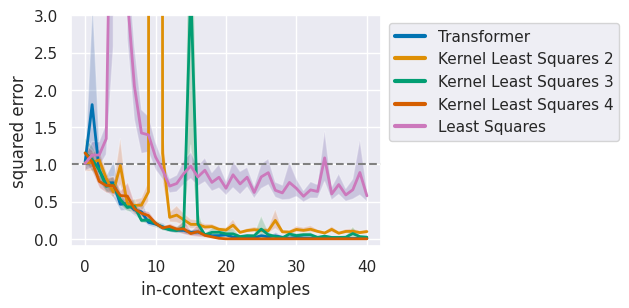

In [28]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
print(models)
print(metrics)
print(metrics)
print(conf)
basic_plot(metrics["standard"], models=models)
plt.show()

In [33]:
# plot any OOD metrics
for name, metric in metrics.items():
    if name == "standard": continue
   
    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0

    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, models=models, trivial=trivial * scale)
    ax.set_title(name)
    
    if "ortho" in name:
        ax.set_xlim(-1, n_dims - 1)
    ax.set_ylim(-.1 * scale, 1.5 * scale)

    plt.show()

# Interactive setup

We will now directly load the model and measure its in-context learning ability on a batch of random inputs. (In the paper we average over multiple such batches to obtain better estimates.)

In [34]:
from samplers import get_data_sampler
from tasks import get_task_sampler

In [35]:
model, conf = get_model_from_run(run_path)

n_dims = conf.model.n_dims
batch_size = conf.training.batch_size

data_sampler = get_data_sampler(conf.training.data, n_dims)
task_sampler = get_task_sampler(
    conf.training.task,
    n_dims,
    batch_size,
    **conf.training.task_kwargs
)

In [36]:
task = task_sampler()
xs = data_sampler.sample_xs(b_size=batch_size, n_points=conf.training.curriculum.points.end)
ys = task.evaluate(xs)

In [37]:
with torch.no_grad():
    pred = model(xs, ys)

5


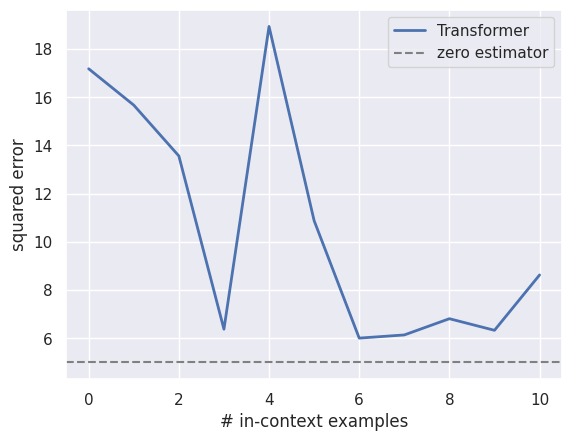

In [42]:
metric = task.get_metric()
loss = metric(pred, ys).numpy()

sparsity = conf.training.task_kwargs.sparsity if "sparsity" in conf.training.task_kwargs else None
baseline = {
    "kernel_linear_regression": n_dims,
    "linear_regression": n_dims,
    "sparse_linear_regression": sparsity,
    "relu_2nn_regression": n_dims,
    "decision_tree": 1,
}[conf.training.task]
plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

As an exploration example, let's see how robust the model is to doubling all the inputs.

In [43]:
xs2 = 2 * xs
ys2 = task.evaluate(xs2)
with torch.no_grad():
    pred2 = model(xs2, ys2)

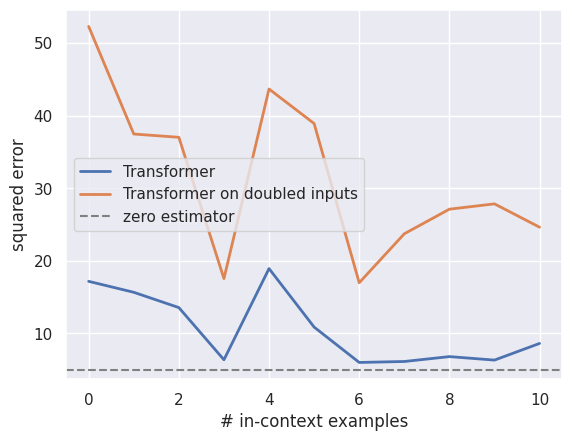

In [44]:
loss2 = metric(pred2, ys2).numpy()

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.plot(loss2.mean(axis=0) / 4, lw=2, label="Transformer on doubled inputs")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

The error does increase, especially when the number of in-context examples exceeds the dimension, but the model is still relatively accurate.